# 簡單線性迴歸
### $\begin{equation}y = wx + b\end{equation}$

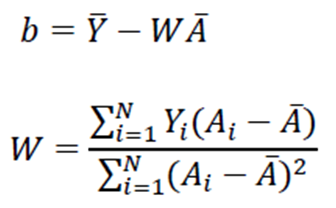

In [2]:
# OLS 公式
from IPython.display import Image
Image('./formula/regression_wb.png')

In [3]:
# 使用 OLS 公式計算 w、b
# 載入套件
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# 載入資料集
df = pd.read_csv('./data/population.csv')

w = ((df['pop'] - df['pop'].mean()) * df['year']).sum() \
     / ((df['year'] - df['year'].mean())**2).sum()
b = df['pop'].mean() - w * df['year'].mean()

print(f'w={w}, b={b}')

w=0.06115935866155474, b=-116.35631056117153


## 使用NumPy函數polyfit驗算

In [4]:
coef = np.polyfit(df['year'], df['pop'], deg=1)
print(f'w={coef[0]}, b={coef[1]}')

w=0.061159358661554586, b=-116.35631056117121


## 使用Scikit-Learn LinearRegression類別驗算

In [6]:
from sklearn.linear_model import LinearRegression

X, y = df[['year']].values, df['pop'].values

lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([0.06115936]), -116.3563105611711)

## 使用公式預測2050年人口數

In [7]:
print(2050 * coef[0]+coef[1])

9.02037469501569


## 使用矩陣計算

In [8]:
import numpy as np

X = df[['year']].values

# b = b * 1
one=np.ones((len(df), 1))

# 將 x 與 one 合併 
X = np.concatenate((X, one), axis=1)

y = df[['pop']].values

# 求解
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'w={w[0, 0]}, b={w[1, 0]}')

w=0.06115935866154644, b=-116.35631056115507


## 以Scikit-Learn的房價資料集為例，求解線性迴歸

In [36]:
# 載入 Boston 房價資料集
with open('./data/housing.data', encoding='utf8') as f:
    data = f.readlines()
all_fields = []
for line in data:
    line2 = line[1:].replace('   ', ' ').replace('  ', ' ')
    fields = []
    for item in line2.split(' '):
        fields.append(float(item.strip()))
        if len(fields) == 14:
            all_fields.append(fields)
df = pd.DataFrame(all_fields)
df.columns = 'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV'.split(',')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## 使用矩陣計算

In [38]:
X, y = df.drop('MEDV', axis=1).values, df.MEDV.values

# b = b * 1
one=np.ones((X.shape[0], 1))

# 將 x 與 one 合併 
X2 = np.concatenate((X, one), axis=1)

# 求解
w = np.linalg.inv(X2.T @ X2) @ X2.T @ y
w

array([-8.24018871e-02,  4.28019470e-02,  2.97062579e-02,  2.82753069e+00,
       -1.66956044e+01,  3.86229930e+00,  7.17230455e-04, -1.39629728e+00,
        2.65322847e-01, -1.21579146e-02, -9.44501537e-01,  1.04233726e-02,
       -5.48474742e-01,  3.49821437e+01])

## 以Scikit-Learn的線性迴歸驗證

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

lr.coef_, lr.intercept_

(array([-8.24018871e-02,  4.28019470e-02,  2.97062579e-02,  2.82753069e+00,
        -1.66956044e+01,  3.86229930e+00,  7.17230455e-04, -1.39629728e+00,
         2.65322847e-01, -1.21579146e-02, -9.44501537e-01,  1.04233726e-02,
        -5.48474742e-01]),
 34.982143659371786)